ideje:
    usporedba kvartova u zg i st ako se netko zeli preselit
    usporedba kvartova u zg i st ako netko zeli otvorit nesto sezonski?
    uzet samo st i clusterirat pa vidit di otvorit nesto? https://medium.com/@gaborkoros/ibm-data-science-course-capstone-project-ae681ac9b4bd
    

In [352]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Folium installed
Libraries imported.


hidden_cell

In [353]:
geolocator = Nominatim(user_agent="foursquare_agent")

Split - gradski kotarevi

In [354]:
split_gk = pd.read_excel('https://www.split.hr/DesktopModules/Bring2mind/DMX/API/Entries/Download?language=hr-HR&Command=Core_Download&EntryId=6080&PortalId=0',
                        header=1)
split_gk

,R.BR.,NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI,SJEDIŠTE,INTERNETSKA STRANICA JEDINICE MJESNE SAMOUPRAVE,TAJNIK/ICA,ADRESA E-POŠTE JEDINICE MJESNE SAMOUPRAVE,TELEFON JEDINICE MJESNE SAMOUPRAVE
0,1,GK BAČVICE,VIŠKA 7,www.split.hr,ANKICA MIKULIĆ,ankica.mikulic@split.hr,021 682 502
1,2,GK BLATINE ŠKRAPE,POLJIČKA CESTA 31,www.split.hr,DANICA PERKOVIĆ,danica.perkovic@split.hr,021 682 504
2,3,GK BOL,SLOBODE 24,www.split.hr,VESNA BALEN,vesna.balen@split.hr,021 310 377
3,4,GK BRDA,MOSTARSKA 17,www.split.hr,SNJEŽANA DRAŽIĆ,snjezana.drazic@split.hr,021 310367
4,5,GK GRAD,BERNARDINOVA 1,www.split.hr,NIKOLA BAKIĆ,nikola.bakic@split.hr,021 682 506
5,6,GK GRIPE,MATICE HRVATSKE 16,www.split.hr,ANTONIJA PIRIĆ,antonija.piric@split.hr,021 310 355
6,7,GK KMAN,ŠIBENSKA 27,www.split.hr,ELVIRA KROLO,elvira.krolo@split.hr,021 682 508
7,8,GK KOCUNAR,MOSEĆKA 56,www.split.hr,KATIJA ČUKUŠIĆ,katija.cukusic@split.hr,021 682 510
8,9,GK LOKVE,ŠIŽGORIĆEVA 5,www.split.hr,HERTA JUKIĆ,herta.jukic@split.hr,021 682 512
9,10,GK LOVRET,GUNDULIĆEVA 11,www.split.hr,SLAVICA TOMAŠ,slavica.tomas@split.hr,021 310 379


In [355]:
split_gk = split_gk[['NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI']].copy()
split_gk

,NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI
0,GK BAČVICE
1,GK BLATINE ŠKRAPE
2,GK BOL
3,GK BRDA
4,GK GRAD
5,GK GRIPE
6,GK KMAN
7,GK KOCUNAR
8,GK LOKVE
9,GK LOVRET


In [356]:
split_gk.rename(columns={'NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI':'Neighborhood'}, inplace = True) 
split_gk

,Neighborhood
0,GK BAČVICE
1,GK BLATINE ŠKRAPE
2,GK BOL
3,GK BRDA
4,GK GRAD
5,GK GRIPE
6,GK KMAN
7,GK KOCUNAR
8,GK LOKVE
9,GK LOVRET


In [357]:
# MO's are not acctualy borougs

In [358]:
split_gk = split_gk[split_gk['Neighborhood'].str.startswith('GK ') == True].copy()
split_gk

,Neighborhood
0,GK BAČVICE
1,GK BLATINE ŠKRAPE
2,GK BOL
3,GK BRDA
4,GK GRAD
5,GK GRIPE
6,GK KMAN
7,GK KOCUNAR
8,GK LOKVE
9,GK LOVRET


In [359]:
def get_lat_long_4_split(row):
    address = row['Neighborhood'].split('GK ')[-1] + ', Split, Croatia'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    return [latitude, longitude]

In [360]:
split_gk['lat_long'] = split_gk.apply(get_lat_long_4_split, axis=1)

43.5038434 16.4472256
43.5077835 16.4602295
43.2605186 16.6520192
43.5244055 16.4691728
43.5088227 16.4391915
43.5081044 16.4526551
43.5182442 16.4559894
43.5184036 16.4663294
43.5105815 16.4586079
43.514789 16.4385284
43.5092019 16.4459693
43.5049281 16.4203784
43.5169814 16.4887985
43.508852 16.4806658
43.5225147 16.4800004
43.5138692 16.456283
43.5169333 16.4751395
43.5203906 16.4701873
43.508119 16.5094344
43.5145952 16.4313131
43.5104659 16.4686614
43.5155417 16.4634358
43.5090223 16.5260117
43.5049847 16.4728603
43.5096862 16.433803
43.5127408 16.4781935
43.5045466 16.4907843


In [361]:
split_gk

,Neighborhood,lat_long
0,GK BAČVICE,"[43.5038434, 16.4472256]"
1,GK BLATINE ŠKRAPE,"[43.5077835, 16.4602295]"
2,GK BOL,"[43.2605186, 16.6520192]"
3,GK BRDA,"[43.5244055, 16.4691728]"
4,GK GRAD,"[43.5088227, 16.4391915]"
5,GK GRIPE,"[43.5081044, 16.4526551]"
6,GK KMAN,"[43.5182442, 16.4559894]"
7,GK KOCUNAR,"[43.5184036, 16.4663294]"
8,GK LOKVE,"[43.5105815, 16.4586079]"
9,GK LOVRET,"[43.514789, 16.4385284]"


zagreb - https://hr.wikipedia.org/wiki/Zagreba%C4%8Dke_gradske_%C4%8Detvrti

In [362]:
zagreb_gk = pd.read_html('https://hr.wikipedia.org/wiki/Zagreba%C4%8Dke_gradske_%C4%8Detvrti',attrs={"cellpadding": "4"})
zagreb_gk[0]

,Unnamed: 0,Gradska četvrt,Površina(km²),Stanovništvo (2011.),Gustoćastanovnika
0,1.0,Donji grad,3,37.024,12.341
1,2.0,Gornji grad - Medveščak,10,30.962,3.096
2,3.0,Trnje,7,42.282,6.040
3,4.0,Maksimir,14,48.902,3.493
4,5.0,Peščenica - Žitnjak,35,56.487,1.614
5,6.0,Novi Zagreb - istok,17,59.055,3.474
6,7.0,Novi Zagreb - zapad,63,58.103,922.000
7,8.0,Trešnjevka - sjever,6,55.425,9.238
8,9.0,Trešnjevka - jug,10,66.674,6.667
9,10.0,Črnomerec,24,38.546,1.606


In [363]:
zagreb_gk = zagreb_gk[0]

remove last row, since it represents sum

In [364]:
zagreb_gk = zagreb_gk.iloc[:-1, :]
zagreb_gk = zagreb_gk.copy()

In [365]:
zagreb_gk.rename(columns={'Gradska četvrt':'Neighborhood'}, inplace = True) 
zagreb_gk

,Unnamed: 0,Neighborhood,Površina(km²),Stanovništvo (2011.),Gustoćastanovnika
0,1.0,Donji grad,3,37.024,12.341
1,2.0,Gornji grad - Medveščak,10,30.962,3.096
2,3.0,Trnje,7,42.282,6.040
3,4.0,Maksimir,14,48.902,3.493
4,5.0,Peščenica - Žitnjak,35,56.487,1.614
5,6.0,Novi Zagreb - istok,17,59.055,3.474
6,7.0,Novi Zagreb - zapad,63,58.103,922.000
7,8.0,Trešnjevka - sjever,6,55.425,9.238
8,9.0,Trešnjevka - jug,10,66.674,6.667
9,10.0,Črnomerec,24,38.546,1.606


In [366]:
zagreb_gk = pd.DataFrame(zagreb_gk['Neighborhood'])
zagreb_gk

,Neighborhood
0,Donji grad
1,Gornji grad - Medveščak
2,Trnje
3,Maksimir
4,Peščenica - Žitnjak
5,Novi Zagreb - istok
6,Novi Zagreb - zapad
7,Trešnjevka - sjever
8,Trešnjevka - jug
9,Črnomerec


In [367]:
def get_lat_long_4_zagreb(row):
    address = row['Neighborhood'] + ', Zagreb, Croatia'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    return [latitude, longitude]

In [368]:
zagreb_gk['lat_long'] = zagreb_gk.apply(get_lat_long_4_zagreb, axis=1)

45.8098781 15.9770807
45.8399258 15.975095536608798
45.762893 16.13841
45.8333119 16.0101508
45.81203395 16.0080265471029
45.7595202 16.0079686
45.7765324 15.9720813
45.8011083 15.9388318
45.79828835 15.947751
45.8183009 15.9385808
45.83029 16.0436654
45.8164089 16.0698548
45.8153915 15.8870819
45.8184064 15.8414199
45.888748 15.98454949590066
45.8276052 16.1089837
45.7276494 15.9117981


In [369]:
zagreb_gk

,Neighborhood,lat_long
0,Donji grad,"[45.8098781, 15.9770807]"
1,Gornji grad - Medveščak,"[45.8399258, 15.975095536608798]"
2,Trnje,"[45.762893, 16.13841]"
3,Maksimir,"[45.8333119, 16.0101508]"
4,Peščenica - Žitnjak,"[45.81203395, 16.0080265471029]"
5,Novi Zagreb - istok,"[45.7595202, 16.0079686]"
6,Novi Zagreb - zapad,"[45.7765324, 15.9720813]"
7,Trešnjevka - sjever,"[45.8011083, 15.9388318]"
8,Trešnjevka - jug,"[45.79828835, 15.947751]"
9,Črnomerec,"[45.8183009, 15.9385808]"


In [370]:
zagreb_gk['Town'] = 'Zagreb'

In [371]:
split_gk['Town'] = 'Split'

In [372]:
split_gk

,Neighborhood,lat_long,Town
0,GK BAČVICE,"[43.5038434, 16.4472256]",Split
1,GK BLATINE ŠKRAPE,"[43.5077835, 16.4602295]",Split
2,GK BOL,"[43.2605186, 16.6520192]",Split
3,GK BRDA,"[43.5244055, 16.4691728]",Split
4,GK GRAD,"[43.5088227, 16.4391915]",Split
5,GK GRIPE,"[43.5081044, 16.4526551]",Split
6,GK KMAN,"[43.5182442, 16.4559894]",Split
7,GK KOCUNAR,"[43.5184036, 16.4663294]",Split
8,GK LOKVE,"[43.5105815, 16.4586079]",Split
9,GK LOVRET,"[43.514789, 16.4385284]",Split


In [373]:
# split_gk = split_gk[['NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI', 'lat_long']].copy()
# split_gk

In [374]:
full_towns_df = zagreb_gk.append(split_gk)
full_towns_df

,Neighborhood,lat_long,Town
0,Donji grad,"[45.8098781, 15.9770807]",Zagreb
1,Gornji grad - Medveščak,"[45.8399258, 15.975095536608798]",Zagreb
2,Trnje,"[45.762893, 16.13841]",Zagreb
3,Maksimir,"[45.8333119, 16.0101508]",Zagreb
4,Peščenica - Žitnjak,"[45.81203395, 16.0080265471029]",Zagreb
5,Novi Zagreb - istok,"[45.7595202, 16.0079686]",Zagreb
6,Novi Zagreb - zapad,"[45.7765324, 15.9720813]",Zagreb
7,Trešnjevka - sjever,"[45.8011083, 15.9388318]",Zagreb
8,Trešnjevka - jug,"[45.79828835, 15.947751]",Zagreb
9,Črnomerec,"[45.8183009, 15.9385808]",Zagreb


In [375]:
full_towns_df.reset_index(drop=True, inplace=True)
full_towns_df

,Neighborhood,lat_long,Town
0,Donji grad,"[45.8098781, 15.9770807]",Zagreb
1,Gornji grad - Medveščak,"[45.8399258, 15.975095536608798]",Zagreb
2,Trnje,"[45.762893, 16.13841]",Zagreb
3,Maksimir,"[45.8333119, 16.0101508]",Zagreb
4,Peščenica - Žitnjak,"[45.81203395, 16.0080265471029]",Zagreb
5,Novi Zagreb - istok,"[45.7595202, 16.0079686]",Zagreb
6,Novi Zagreb - zapad,"[45.7765324, 15.9720813]",Zagreb
7,Trešnjevka - sjever,"[45.8011083, 15.9388318]",Zagreb
8,Trešnjevka - jug,"[45.79828835, 15.947751]",Zagreb
9,Črnomerec,"[45.8183009, 15.9385808]",Zagreb


In [376]:
full_towns_df['latitude'] = [tmp_row[0] for tmp_row in full_towns_df['lat_long']]
full_towns_df['longitude'] = [tmp_row[1] for tmp_row in full_towns_df['lat_long']]
full_towns_df

,Neighborhood,lat_long,Town,latitude,longitude
0,Donji grad,"[45.8098781, 15.9770807]",Zagreb,45.809878,15.977081
1,Gornji grad - Medveščak,"[45.8399258, 15.975095536608798]",Zagreb,45.839926,15.975096
2,Trnje,"[45.762893, 16.13841]",Zagreb,45.762893,16.138410
3,Maksimir,"[45.8333119, 16.0101508]",Zagreb,45.833312,16.010151
4,Peščenica - Žitnjak,"[45.81203395, 16.0080265471029]",Zagreb,45.812034,16.008027
5,Novi Zagreb - istok,"[45.7595202, 16.0079686]",Zagreb,45.759520,16.007969
6,Novi Zagreb - zapad,"[45.7765324, 15.9720813]",Zagreb,45.776532,15.972081
7,Trešnjevka - sjever,"[45.8011083, 15.9388318]",Zagreb,45.801108,15.938832
8,Trešnjevka - jug,"[45.79828835, 15.947751]",Zagreb,45.798288,15.947751
9,Črnomerec,"[45.8183009, 15.9385808]",Zagreb,45.818301,15.938581


In [377]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 1BI24KSMPUOG3YHITZOXJCRBGFPT4JSSMUEL13YJROEOY4XT
CLIENT_SECRET:RCOWK2HRZJTASW1JWTDPZIXBRGEJ1LQIH3ARIVQNP41IYBLY


In [378]:
def get_venues(towns, names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for town, name, lat, lng in zip(towns, names, latitudes, longitudes):
        print(town,name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            town,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    return venues_list

In [379]:
st_zg_venues = get_venues(towns=full_towns_df['Town'], names=full_towns_df['Neighborhood'], latitudes=full_towns_df['latitude'], longitudes=full_towns_df['longitude'])
st_zg_venues

Zagreb Donji grad
Zagreb Gornji grad - Medveščak
Zagreb Trnje
Zagreb Maksimir
Zagreb Peščenica - Žitnjak
Zagreb Novi Zagreb - istok
Zagreb Novi Zagreb - zapad
Zagreb Trešnjevka - sjever
Zagreb Trešnjevka - jug
Zagreb Črnomerec
Zagreb Gornja Dubrava
Zagreb Donja Dubrava
Zagreb Stenjevec
Zagreb Podsused - Vrapče
Zagreb Podsljeme
Zagreb Sesvete
Zagreb Brezovica
Split GK BAČVICE
Split GK BLATINE ŠKRAPE
Split GK BOL
Split GK BRDA
Split GK GRAD
Split GK GRIPE
Split GK KMAN
Split GK KOCUNAR
Split GK LOKVE
Split GK LOVRET
Split GK LUČAC MANUŠ
Split GK MEJE
Split GK MEJAŠI
Split GK MERTOJAK
Split GK NESLANOVAC
Split GK PLOKITE
Split GK PUJANKE
Split GK RAVNE NJIVE
Split GK SIROBUJA
Split GK SPINUT
Split GK SPLIT 3
Split GK SUĆIDAR
Split GK ŠINE
Split GK TRSTENIK
Split GK VAROŠ
Split GK VISOKA 
Split GK ŽNJAN


[[('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Trg Nikole Šubića Zrinskog | Zrinjevac',
   45.810243645100215,
   15.978109413861207,
   'Plaza'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Quahwa',
   45.811029876939294,
   15.975470896679635,
   'Café'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Heritage Croatian Food',
   45.81081,
   15.979922,
   'Comfort Food Restaurant'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Buzz Bar Zagreb',
   45.80893868618315,
   15.974638871006078,
   'Bar'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Korica',
   45.8075492835984,
   15.974862717852943,
   'Bakery'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Zagrebačko kazalište mladih (ZKM)',
   45.811198655998,
   15.976042350202558,
   'Theater'),
  ('Zagreb',
   'Donji grad',
   45.8098781,
   15.9770807,
   'Express Bar',
   45.81198737800094,
   15.97928524737915,
   'Coffe

In [380]:
new_venue_list = list()
for tmp_st_zg_venues in st_zg_venues:
    for venue in tmp_st_zg_venues:
        new_venue_list.append(venue)
new_venue_list

[('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Trg Nikole Šubića Zrinskog | Zrinjevac',
  45.810243645100215,
  15.978109413861207,
  'Plaza'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Quahwa',
  45.811029876939294,
  15.975470896679635,
  'Café'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Heritage Croatian Food',
  45.81081,
  15.979922,
  'Comfort Food Restaurant'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Buzz Bar Zagreb',
  45.80893868618315,
  15.974638871006078,
  'Bar'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Korica',
  45.8075492835984,
  15.974862717852943,
  'Bakery'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Zagrebačko kazalište mladih (ZKM)',
  45.811198655998,
  15.976042350202558,
  'Theater'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15.9770807,
  'Express Bar',
  45.81198737800094,
  15.97928524737915,
  'Coffee Shop'),
 ('Zagreb',
  'Donji grad',
  45.8098781,
  15

In [381]:
nearby_venues = pd.DataFrame(columns = ['Town', 'Neighborhood', 
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category'], data = new_venue_list)
nearby_venues

,Town,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zagreb,Donji grad,45.809878,15.977081,Trg Nikole Šubića Zrinskog | Zrinjevac,45.810244,15.978109,Plaza
1,Zagreb,Donji grad,45.809878,15.977081,Quahwa,45.811030,15.975471,Café
2,Zagreb,Donji grad,45.809878,15.977081,Heritage Croatian Food,45.810810,15.979922,Comfort Food Restaurant
3,Zagreb,Donji grad,45.809878,15.977081,Buzz Bar Zagreb,45.808939,15.974639,Bar
4,Zagreb,Donji grad,45.809878,15.977081,Korica,45.807549,15.974863,Bakery
...,...,...,...,...,...,...,...,...
1450,Split,GK ŽNJAN,43.504547,16.490784,Pizzeria Bepina,43.506512,16.488084,Pizza Place
1451,Split,GK ŽNJAN,43.504547,16.490784,Duilovo,43.501846,16.493233,Beach
1452,Split,GK ŽNJAN,43.504547,16.490784,Plodine,43.509166,16.493281,Grocery Store
1453,Split,GK ŽNJAN,43.504547,16.490784,Tommy,43.506504,16.483621,Grocery Store


In [382]:
nearby_venues.groupby('Neighborhood').count()

,Town,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Brezovica,4,4,4,4,4,4,4
Donja Dubrava,5,5,5,5,5,5,5
Donji grad,100,100,100,100,100,100,100
GK BAČVICE,94,94,94,94,94,94,94
GK BLATINE ŠKRAPE,49,49,49,49,49,49,49
GK BOL,35,35,35,35,35,35,35
GK BRDA,6,6,6,6,6,6,6
GK GRAD,100,100,100,100,100,100,100
GK GRIPE,57,57,57,57,57,57,57


In [383]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 153 uniques categories.


In [384]:
# one hot encoding
st_zagreb_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood and town column back to dataframe
st_zagreb_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 
st_zagreb_onehot['Town'] = nearby_venues['Town'] 
st_zagreb_onehot

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,...,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store,Town
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Zagreb
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Zagreb
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Zagreb
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Zagreb
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Zagreb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Split
1451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Split
1452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Split
1453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Split


In [385]:
fixed_columns = ['Town', 'Neighborhood'] + [item for item in list(st_zagreb_onehot.columns) if item not in ['Neighborhood', 'Town']]
fixed_columns

['Town',
 'Neighborhood',
 'American Restaurant',
 'Art Gallery',
 'Art Museum',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bistro',
 'Board Shop',
 'Boarding House',
 'Boat or Ferry',
 'Bookstore',
 'Breakfast Spot',
 'Brewery',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Cafeteria',
 'Café',
 'Campground',
 'Candy Store',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Drugstore',
 'Eastern European Restaurant',
 'Electronics Store',
 'Escape Room',
 'Exhibit',
 'Eye Doctor',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Field',
 'Fish Market',
 'Flea Market',
 'Food',
 'Food & Drink Shop',
 'Furniture / Home Store',
 

In [386]:
# move town and neighborhood columns on first two places
st_zagreb_onehot = st_zagreb_onehot[fixed_columns]
st_zagreb_onehot.head()

,Town,Neighborhood,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Zagreb,Donji grad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Zagreb,Donji grad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Zagreb,Donji grad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Zagreb,Donji grad,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Zagreb,Donji grad,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
st_zagreb_onehot_grouped = st_zagreb_onehot.groupby(['Town','Neighborhood']).mean().reset_index()
st_zagreb_onehot_grouped

,Town,Neighborhood,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Split,GK BAČVICE,0.00,0.000000,0.00,0.000000,0.010638,0.000000,0.010638,0.042553,...,0.000000,0.000000,0.000000,0.0,0.010638,0.010638,0.031915,0.00,0.000000,0.000000
1,Split,GK BLATINE ŠKRAPE,0.00,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.020408,0.00,0.000000,0.000000
2,Split,GK BOL,0.00,0.000000,0.00,0.000000,0.000000,0.028571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Split,GK BRDA,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Split,GK GRAD,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.020000,0.050000,...,0.000000,0.000000,0.010000,0.0,0.000000,0.010000,0.020000,0.00,0.020000,0.000000
5,Split,GK GRIPE,0.00,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.052632,...,0.000000,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.00,0.000000,0.000000
6,Split,GK KMAN,0.00,0.000000,0.00,0.000000,0.045455,0.000000,0.000000,0.090909,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Split,GK KOCUNAR,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.181818,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Split,GK LOKVE,0.00,0.000000,0.00,0.024390,0.000000,0.000000,0.000000,0.121951,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.024390,0.00,0.000000,0.000000
9,Split,GK LOVRET,0.00,0.010870,0.00,0.000000,0.000000,0.000000,0.021739,0.043478,...,0.000000,0.000000,0.000000,0.0,0.000000,0.010870,0.021739,0.00,0.021739,0.000000


In [388]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

In [389]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town', 'Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Town'] = st_zagreb_onehot_grouped['Town']
neighborhoods_venues_sorted['Neighborhood'] = st_zagreb_onehot_grouped['Neighborhood']

for ind in np.arange(st_zagreb_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(st_zagreb_onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Town,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Split,GK BAČVICE,Boat or Ferry,Café,Mediterranean Restaurant,Hostel,Bar,Restaurant,Grocery Store,Italian Restaurant,Vegetarian / Vegan Restaurant,Hotel
1,Split,GK BLATINE ŠKRAPE,Café,Bar,Coffee Shop,Restaurant,Mediterranean Restaurant,Eastern European Restaurant,Bistro,Pizza Place,Hotel,Vegetarian / Vegan Restaurant
2,Split,GK BOL,Hotel,Mediterranean Restaurant,Seafood Restaurant,Pizza Place,Surf Spot,Café,Beach,Tapas Restaurant,Food,Boarding House
3,Split,GK BRDA,Grocery Store,Electronics Store,Big Box Store,Bar,Cafeteria,Café,Women's Store,Fast Food Restaurant,Flea Market,Fish Market
4,Split,GK GRAD,Mediterranean Restaurant,Bar,Restaurant,Boat or Ferry,Hostel,Pizza Place,Italian Restaurant,Hotel,Ice Cream Shop,Plaza


## KNN 

In [390]:
max_num_clusters = 9

In [391]:
from sklearn.metrics import silhouette_samples, silhouette_score

st_zagreb_onehot_grouped.drop(['Town', 'Neighborhood'], axis=1, inplace=True)
st_zagreb_onehot_grouped

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,...,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store
0,0.00,0.000000,0.00,0.000000,0.010638,0.000000,0.010638,0.042553,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.010638,0.010638,0.031915,0.00,0.000000,0.000000
1,0.00,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.020408,0.00,0.000000,0.000000
2,0.00,0.000000,0.00,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.020000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.010000,0.0,0.000000,0.010000,0.020000,0.00,0.020000,0.000000
5,0.00,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.00,0.000000,0.000000
6,0.00,0.000000,0.00,0.000000,0.045455,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,0.00,0.000000,0.00,0.024390,0.000000,0.000000,0.000000,0.121951,0.000000,0.024390,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.024390,0.00,0.000000,0.000000
9,0.00,0.010870,0.00,0.000000,0.000000,0.000000,0.021739,0.043478,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.010870,0.021739,0.00,0.021739,0.000000


In [392]:
indices = []
scores = []

for tmp_cluster_num in range(2, max_num_clusters) :
    
    # Run k-means clustering
    kmeans = KMeans(n_clusters = tmp_cluster_num, init = 'k-means++', random_state = 42)
    kmeans.fit_predict(st_zagreb_onehot_grouped)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(st_zagreb_onehot_grouped, kmeans.labels_)
    
    # Appending the index and score to the respective lists
    indices.append(tmp_cluster_num)    
    scores.append(score)    

In [393]:
ind_sco_df = pd.DataFrame(columns=["indices", "score"])
ind_sco_df["indices"] = indices
ind_sco_df["score"] = scores
ind_sco_df

,indices,score
0,2,0.118248
1,3,0.099816
2,4,0.124281
3,5,0.121749
4,6,0.200183
5,7,0.128346
6,8,0.129842


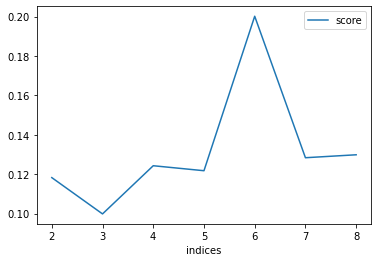

In [394]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
ax = plt.gca()

ind_sco_df.plot(kind='line',x='indices',y='score',ax=ax)

let's pick 4 clusters

In [395]:
# Run k-means clustering
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
kmeans.fit_predict(st_zagreb_onehot_grouped)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 0,
       1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [396]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_
neighborhoods_venues_sorted

,Town,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Split,GK BAČVICE,Boat or Ferry,Café,Mediterranean Restaurant,Hostel,Bar,Restaurant,Grocery Store,Italian Restaurant,Vegetarian / Vegan Restaurant,Hotel,1
1,Split,GK BLATINE ŠKRAPE,Café,Bar,Coffee Shop,Restaurant,Mediterranean Restaurant,Eastern European Restaurant,Bistro,Pizza Place,Hotel,Vegetarian / Vegan Restaurant,1
2,Split,GK BOL,Hotel,Mediterranean Restaurant,Seafood Restaurant,Pizza Place,Surf Spot,Café,Beach,Tapas Restaurant,Food,Boarding House,1
3,Split,GK BRDA,Grocery Store,Electronics Store,Big Box Store,Bar,Cafeteria,Café,Women's Store,Fast Food Restaurant,Flea Market,Fish Market,0
4,Split,GK GRAD,Mediterranean Restaurant,Bar,Restaurant,Boat or Ferry,Hostel,Pizza Place,Italian Restaurant,Hotel,Ice Cream Shop,Plaza,1
5,Split,GK GRIPE,Café,Hotel,Nightclub,Mediterranean Restaurant,Bistro,Fast Food Restaurant,Bar,Cocktail Bar,Gastropub,Grocery Store,1
6,Split,GK KMAN,Hotel,Fast Food Restaurant,Bar,Café,Gym,Bed & Breakfast,Cafeteria,Multiplex,Shopping Plaza,Mobile Phone Shop,1
7,Split,GK KOCUNAR,Grocery Store,Coffee Shop,Bar,Café,Electronics Store,Big Box Store,Cafeteria,Women's Store,Fast Food Restaurant,Flea Market,0
8,Split,GK LOKVE,Café,Bar,Coffee Shop,Bistro,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Mobile Phone Shop,Music Venue,Shopping Mall,1
9,Split,GK LOVRET,Café,Mediterranean Restaurant,Grocery Store,Restaurant,Hostel,Bar,Hotel,Ice Cream Shop,Clothing Store,History Museum,1


In [397]:
len(full_towns_df), len(neighborhoods_venues_sorted)

(44, 43)

In [398]:
full_towns_df.columns

Index(['Neighborhood', 'lat_long', 'Town', 'latitude', 'longitude'], dtype='object')

In [399]:
# merge to add latitude/longitude for each neighborhood
df_merged = full_towns_df.merge(neighborhoods_venues_sorted, on=['Town', 'Neighborhood'])
df_merged

,Neighborhood,lat_long,Town,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Donji grad,"[45.8098781, 15.9770807]",Zagreb,45.809878,15.977081,Café,Plaza,Restaurant,Bar,Dessert Shop,Bistro,Theater,Historic Site,Hostel,Coffee Shop,1
1,Gornji grad - Medveščak,"[45.8399258, 15.975095536608798]",Zagreb,45.839926,15.975096,Eastern European Restaurant,Light Rail Station,Pub,Field,Women's Store,Eye Doctor,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,1
2,Maksimir,"[45.8333119, 16.0101508]",Zagreb,45.833312,16.010151,Restaurant,Café,Steakhouse,Grocery Store,Bus Station,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,0
3,Peščenica - Žitnjak,"[45.81203395, 16.0080265471029]",Zagreb,45.812034,16.008027,Café,Bar,Restaurant,Grocery Store,Dessert Shop,Bus Station,Mediterranean Restaurant,Nightclub,Middle Eastern Restaurant,Brewery,0
4,Novi Zagreb - istok,"[45.7595202, 16.0079686]",Zagreb,45.759520,16.007969,Bakery,Hotel,Train,Paper / Office Supplies Store,Sushi Restaurant,Café,Soccer Field,Restaurant,Diner,Drugstore,1
5,Novi Zagreb - zapad,"[45.7765324, 15.9720813]",Zagreb,45.776532,15.972081,Café,Bakery,Bar,Clothing Store,Women's Store,Soccer Field,Basketball Court,Fast Food Restaurant,Food & Drink Shop,Gym,1
6,Trešnjevka - sjever,"[45.8011083, 15.9388318]",Zagreb,45.801108,15.938832,Bar,Café,Bakery,Grocery Store,Restaurant,Pizza Place,Liquor Store,Hostel,Supermarket,Diner,0
7,Trešnjevka - jug,"[45.79828835, 15.947751]",Zagreb,45.798288,15.947751,Café,Bar,Bakery,Electronics Store,Pizza Place,Supermarket,Grocery Store,Gym / Fitness Center,Restaurant,Drugstore,0
8,Črnomerec,"[45.8183009, 15.9385808]",Zagreb,45.818301,15.938581,Café,Supermarket,BBQ Joint,Grocery Store,Fast Food Restaurant,Art Gallery,Eastern European Restaurant,Bus Station,Pizza Place,Bar,0
9,Gornja Dubrava,"[45.83029, 16.0436654]",Zagreb,45.830290,16.043665,Café,Clothing Store,Bar,Pizza Place,Supermarket,Light Rail Station,Restaurant,Pet Store,Burger Joint,Shoe Store,1


In [400]:
# create map for zagreb
address = 'Zagreb, Croatia'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

df_zg = df_merged[df_merged['Town'] == 'Zagreb'].copy()

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_zg['latitude'], df_zg['longitude'], df_zg['Neighborhood'], df_zg['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)       
map_clusters

In [401]:
# create map for split
address = 'Split, Croatia'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

df_st = df_merged[df_merged['Town'] == 'Split'].copy()

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_st['latitude'], df_st['longitude'], df_st['Neighborhood'], df_st['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)       
map_clusters